1. Загрузите данные за май 2016 года.

2. Проведите фильтрацию: удалите поездки с
нулевой длительностью
нулевым количеством пассажиров
нулевым расстоянием поездки по счётчику
координатами начала, не попадающими в прямоугольник Нью-Йорка
Можно придумать ещё какие-то критерии для фильтрации данных; тем не менее, не стоит применять дополнительные фильтры: начиная с четвёртой недели вам предстоит сравнивать качество ваших прогнозов с качеством прогнозов других слушателей, и, чтобы это сравнение было корректным, нужно, чтобы данные у всех были предобработаны одинаково.

3. Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d. Не забыть проверить, что идентификаторы, присваиваемые ячейкам, соответствуют приложенному выше файлу.

4. Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.

5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.

6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.

7. Загрузите ноутбук в форму ниже

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
ny_coordinates = [[-74.25559, -73.70001],[40.91553, 40.49612]]
NY_west = ny_coordinates[0][0]
NY_east = ny_coordinates[0][1]
NY_north = ny_coordinates[1][0]
NY_south =  ny_coordinates[1][1]

## Загрузка данных

In [4]:
# data = pd.read_csv(filepath_or_buffer='new_data/train.csv',
#                    parse_dates =['tpep_pickup_datetime', 'tpep_dropoff_datetime'],
#                    infer_datetime_format=True)

In [5]:
data = pd.read_csv(filepath_or_buffer='new_data/yellow_tripdata_2016-05.csv',
                   parse_dates =['tpep_pickup_datetime', 'tpep_dropoff_datetime'],
                   infer_datetime_format=True)

# data = pd.read_parquet('new_data/yellow_tripdata_2021-05.parquet')
# zones = pd.read_csv('new_data/taxi+_zone_lookup.csv')

In [6]:
data.shape

(248487, 12)

In [78]:
data.head()

,id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance
0,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.97,40.80,-73.92,40.76,N,1551,5.72
1,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-74.00,40.74,-73.99,40.73,N,255,1.31
2,id1436371,2,2016-05-10 22:08:41,2016-05-10 22:29:55,1,-73.98,40.76,-74.00,40.73,N,1274,3.80
3,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.99,40.75,-73.96,40.77,N,1128,3.78
4,id2900608,2,2016-05-27 00:43:36,2016-05-27 01:07:10,1,-73.99,40.73,-73.97,40.78,N,1414,6.38


In [75]:
# from geopy import distance
# # calculate the distance
# data['trip_distance_check'] = data.apply(lambda row : 
#            distance.geodesic((row['pickup_latitude'], row['pickup_longitude']),
#                              (row['dropoff_latitude'], row['dropoff_longitude'])).km,
#                                    axis=1)

In [33]:
data.head()

,id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance
0,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5.348894
1,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,1.538091
2,id1436371,2,2016-05-10 22:08:41,2016-05-10 22:29:55,1,-73.982651,40.763840,-74.002228,40.732990,N,1274,2.382530
3,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.991531,40.749439,-73.956543,40.770630,N,1128,3.959249
4,id2900608,2,2016-05-27 00:43:36,2016-05-27 01:07:10,1,-73.992195,40.727226,-73.974655,40.783070,N,1414,2.606239


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248487 entries, 0 to 248486
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     248487 non-null  object        
 1   VendorID               248487 non-null  int64         
 2   tpep_pickup_datetime   248487 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  248487 non-null  datetime64[ns]
 4   passenger_count        248487 non-null  int64         
 5   pickup_longitude       248487 non-null  float64       
 6   pickup_latitude        248487 non-null  float64       
 7   dropoff_longitude      248487 non-null  float64       
 8   dropoff_latitude       248487 non-null  float64       
 9   store_and_fwd_flag     248487 non-null  object        
 10  trip_duration          248487 non-null  int64         
 11  trip_distance          248487 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3), 

In [80]:
regions = pd.read_csv('regions.csv', sep=';')
regions.head()

,region,west,east,south,north
0,1,-74.26,-74.24,40.50,40.50
1,2,-74.26,-74.24,40.50,40.51
2,3,-74.26,-74.24,40.51,40.52
3,4,-74.26,-74.24,40.52,40.53
4,5,-74.26,-74.24,40.53,40.54


## Фильтруем данные

In [81]:
data = data[(data.tpep_pickup_datetime != data.tpep_dropoff_datetime)&
            (data.passenger_count > 0)&
            (data.trip_distance > 0)&
            (data.pickup_latitude <= NY_north)&
            (data.pickup_latitude >= NY_south)&
            (data.pickup_longitude<= NY_east)&
            (data.pickup_longitude>= NY_west)
           ]

In [82]:
len(data)

247465

In [83]:
data.tpep_pickup_datetime = data.tpep_pickup_datetime\
                .apply(lambda x: x.replace(minute=0, second=0))

In [84]:
print(data.tpep_pickup_datetime)

0        2016-05-21 07:00:00
1        2016-05-27 23:00:00
2        2016-05-10 22:00:00
3        2016-05-15 11:00:00
4        2016-05-27 00:00:00
                 ...        
248482   2016-05-30 14:00:00
248483   2016-05-09 14:00:00
248484   2016-05-30 03:00:00
248485   2016-05-14 23:00:00
248486   2016-05-19 14:00:00
Name: tpep_pickup_datetime, Length: 247465, dtype: datetime64[ns]


## Агрегируем данные

In [85]:
# Берем поездки и считываем функцией binned_stat для получения данных по поездкам
def trips_2d_stat (x,y, 
                   marked_regions,
                   crd = [-74.25559, -73.70001, 40.49612, 40.91553]):
    west,east,south,north=crd
    
    stat = binned_statistic_2d(x,y, np.arange(len(x)), statistic='count',
                               range=[[west,east],[south,north]],
                               bins=[marked_regions.west.append(marked_regions.east).unique(),
                                     marked_regions.south.append(marked_regions.north).unique()],
                               expand_binnumbers=True)
    
    return(stat.statistic.ravel())

## Поиск и присваивание секторов. Их сверка

In [86]:
#function for finding long-latit region
def reg_l_l(reg_data, data):
    print(data)
    return((reg_data.north >= data.pickup_latitude)& # Ю или равен С
          (reg_data.south <= data.pickup_latitude)&  # С или равен Ю
          (reg_data.west  <= data.pickup_longitude)& # В или равен З
          (reg_data.east  >=  data.pickup_longitude))# З или равен В

# делим сектора
def long(val, west, east):
#     return(abs(np.ceil(((val-west)*50)/(east-west))))
    return(np.ceil(((val-west)*50)/(east-west)))

def lat(val, north, south):
#     return(abs(np.ceil(((val-south)*50)/(north-south))))
    return(np.ceil(((val-south)*50)/(north-south)))

def sector(latitude, longitude, north, south, east, west):
    return((long(longitude, west, east) -1)*50 + lat(latitude, north, south))

assert regions[reg_l_l(regions, data.iloc[0])].region.values[0] == sector(data.iloc[0].pickup_latitude, data.iloc[0].pickup_longitude, NY_north, NY_south, NY_east, NY_west),'Result from *finding sector* function isn`t equal'
print('Checking complete. All is ok.')

id                                 id1324603
VendorID                                   2
tpep_pickup_datetime     2016-05-21 07:00:00
tpep_dropoff_datetime    2016-05-21 08:20:49
passenger_count                            1
pickup_longitude                      -73.97
pickup_latitude                        40.80
dropoff_longitude                     -73.92
dropoff_latitude                       40.76
store_and_fwd_flag                         N
trip_duration                           1551
trip_distance                           5.72
Name: 0, dtype: object
Checking complete. All is ok.


In [87]:
data['region'] = sector(data.pickup_latitude, 
                        data.pickup_longitude, 
                        NY_north, 
                        NY_south, 
                        NY_east, 
                        NY_west)

In [88]:
data.head()

,id,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance,region
0,id1324603,2,2016-05-21 07:00:00,2016-05-21 08:20:49,1,-73.97,40.80,-73.92,40.76,N,1551,5.72,1286.00
1,id1301050,1,2016-05-27 23:00:00,2016-05-27 23:16:38,1,-74.00,40.74,-73.99,40.73,N,255,1.31,1179.00
2,id1436371,2,2016-05-10 22:00:00,2016-05-10 22:29:55,1,-73.98,40.76,-74.00,40.73,N,1274,3.80,1232.00
3,id1299289,2,2016-05-15 11:00:00,2016-05-15 11:34:59,4,-73.99,40.75,-73.96,40.77,N,1128,3.78,1181.00
4,id2900608,2,2016-05-27 00:00:00,2016-05-27 01:07:10,1,-73.99,40.73,-73.97,40.78,N,1414,6.38,1178.00


##  Собираем по часам и датам

In [89]:
def hour(date):
    date = date.replace(day = 1, hour = 0, minute = 0, second =0)
    month_target = date.month
    month = date.month
    result =[]
    
    while month_target == month:
        result.append(date)
        date = date + datetime.timedelta(hours = 1)
        month = date.month
        
    return(result)

In [90]:
hours = hour(data.tpep_pickup_datetime[0])

In [91]:
for i in hours:
    values = np.zeros((regions.shape[0],))
    regions[i] = values

/var/folders/z3/98b_qhl16kv_d42sr0dy27mm0000gn/T/ipykernel_4985/3664209608.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  regions[i] = values
/var/folders/z3/98b_qhl16kv_d42sr0dy27mm0000gn/T/ipykernel_4985/3664209608.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  regions[i] = values
/var/folders/z3/98b_qhl16kv_d42sr0dy27mm0000gn/T/ipykernel_4985/3664209608.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

/var/folders/z3/98b_qhl16kv_d42sr0dy27mm0000gn/T/ipykernel_4985/3664209608.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  regions[i] = values
/var/folders/z3/98b_qhl16kv_d42sr0dy27mm0000gn/T/ipykernel_4985/3664209608.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  regions[i] = values
/var/folders/z3/98b_qhl16kv_d42sr0dy27mm0000gn/T/ipykernel_4985/3664209608.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [92]:
# stats at trips
for i in set(data.tpep_pickup_datetime):
    chunk = data[data.tpep_pickup_datetime == i]
    x = np.array(chunk.pickup_longitude)
    y = np.array(chunk.pickup_latitude)
    regions[i] = np.array(regions[i]) + trips_2d_stat(x,y,regions)

/var/folders/z3/98b_qhl16kv_d42sr0dy27mm0000gn/T/ipykernel_4985/2020167841.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bins=[marked_regions.west.append(marked_regions.east).unique(),
/var/folders/z3/98b_qhl16kv_d42sr0dy27mm0000gn/T/ipykernel_4985/2020167841.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  marked_regions.south.append(marked_regions.north).unique()],


In [93]:
clmns = [0] + list(range(regions.shape[1]))[:10]
regions.iloc[0:2, clmns]

,region,region,west,east,south,north,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00
0,1,1,-74.26,-74.24,40.50,40.50,0.00,0.00,0.00,0.00,0.00
1,2,2,-74.26,-74.24,40.50,40.51,0.00,0.00,0.00,0.00,0.00


In [94]:
regions.iloc[:, [0, 5, 6]]

,region,2016-05-01 00:00:00,2016-05-01 01:00:00
0,1,0.00,0.00
1,2,0.00,0.00
2,3,0.00,0.00
3,4,0.00,0.00
4,5,0.00,0.00
...,...,...,...
2495,2496,0.00,0.00
2496,2497,0.00,0.00
2497,2498,0.00,0.00
2498,2499,0.00,0.00


## ESB
Постройка графика количества поездок жёлтого такси из ячейки, содержащей Empire State Building. Координаты ESB взяты с сайта: https://www.gps-latitude-longitude.com/gps-coordinates-of-empire-state-building-new-york

In [95]:
#Longitude of Empire State Building New York: -73.985664
#Latitude of Empire State Building New York: 40.748441
ESB_long = -73.985664
ESB_lat  =  40.748441

In [96]:
ESB_reg = int(sector(ESB_lat, ESB_long, NY_north, NY_south, NY_east, NY_west))
print('Empire State Building stay at',ESB_reg, 'region')

Empire State Building stay at 1231 region


Text(0, 0.5, 'Trips')

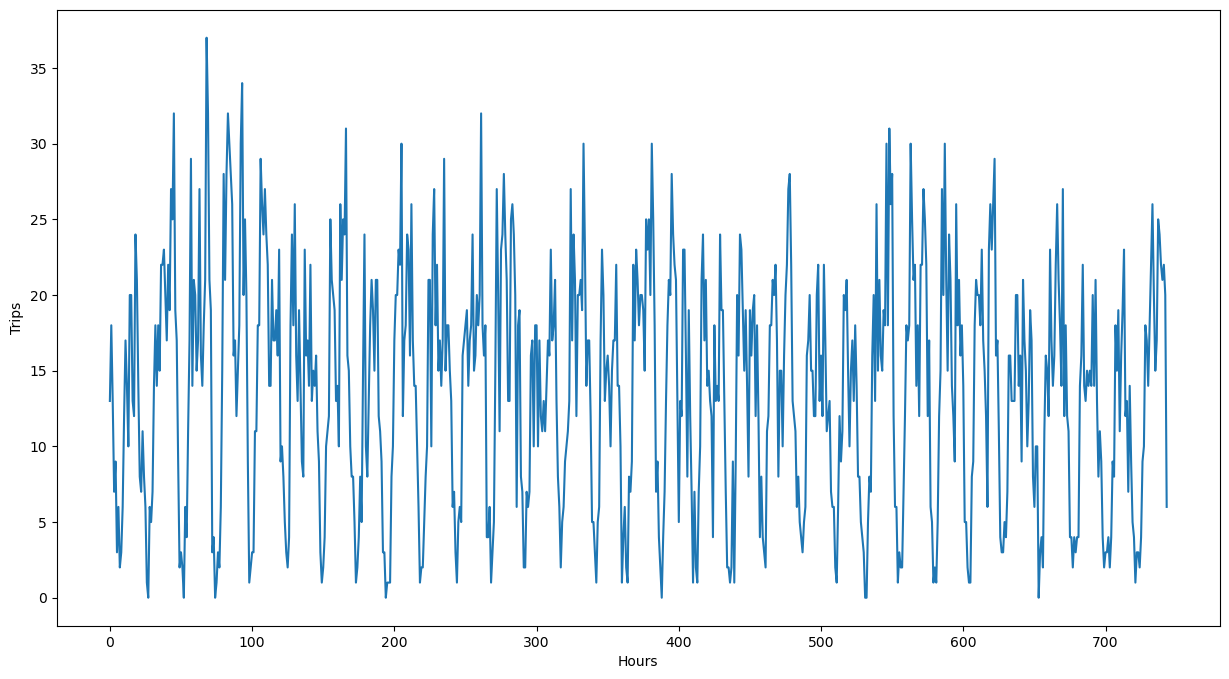

In [97]:
trips = np.array(regions.iloc[ESB_reg-1, 5:])
hours = list(range(len(trips)))
plt.figure(figsize=(15,8))
plt.plot(hours, trips)
#plt.axes().set_aspect('auto')
plt.xlabel('Hours')
plt.ylabel('Trips')

## Количество пар час ячейка с 0 поездок в мае 2016 

In [98]:
N_zeros = np.array(regions.iloc[:,5:])
zeros = N_zeros.size - np.count_nonzero(N_zeros)

In [99]:
print(N_zeros.size, 'Количество пар ячеек')
print(zeros, "Из них 0")

1860000 Количество пар ячеек
1815831 Из них 0


In [106]:
import pickle
with open('data_week1.pkl','wb') as fid:
    pickle.dump(data, fid)

In [105]:
with open('regions_week1.pkl','wb') as fid:
    pickle.dump(regions, fid)